In [2]:
import pandas as pd
import dash
import base64

In [6]:
df = pd.read_csv('../BaHaMut_9.csv')
type(df)
df1 = df.reset_index()
df1.columns
df1

,index,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
0,0,叫我對大哥 (TV版),2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1.8,21.7
1,1,汪汪與喵喵,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0.3,6.6
2,2,鬼滅之刃 刀匠村篇,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,49.9,548.8
3,3,IDOLiSH7 - 偶像星願 - Third BEAT！,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1.9,56.0
4,4,薄櫻鬼 新OVA,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,433,土下座跪求給看 年齡限制版,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8.0,103.4
434,434,女神宿舍的管理員。 年齡限制版,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11.3,112.7
435,435,彼得・格里爾的賢者時間 年齡限制版,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11.2,133.9
436,436,壽司大相撲,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0.4,23.3


In [ ]:
import dash
from dash import Dash, html, Input, Output, State, dash_table
import dash_bootstrap_components as dbc
import pandas as pd

data_url = (
    "https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv"
)
df = pd.read_csv(data_url)

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


app.layout = dbc.Container(
    [
        html.H4("Table with a Modal in the State Column"),
        dash_table.DataTable(
            id="table",
            columns=[{"name": i, "id": i} for i in df.columns],
            data=df.to_dict("records"),
            style_cell=dict(textAlign="left"),
            page_size=10,
        ),
        dbc.Modal(
            [
                dbc.ModalHeader(dbc.ModalTitle("Header")),
                dbc.ModalBody(id="modal-content"),
            ],
            id="modal",
            is_open=False,
        ),
    ]
)


@app.callback(
    Output("modal-content", "children"),
    Output("modal", "is_open"),
    Input("table", "active_cell"),

)
def update_graphs(active_cell):
    if active_cell and active_cell["column_id"] == "State":
        cell_data = df.iloc[active_cell["row"]][active_cell["column_id"]]
        return cell_data, True
    return dash.no_update, False


if __name__ == "__main__":
    app.run_server(host='127.0.0.1', port=8051, debug=True)

In [ ]:
import base64
import dash
from dash import html, callback, Output, Input
import dash_bootstrap_components as dbc

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# 图片的 Base64 编码字符串
image_filename = '../static/images/史萊姆.png'
encoded_image = base64.b64encode(open(image_filename, 'rb').read()).decode('utf-8')

app.layout = html.Div([
    dbc.Button("打开模态窗口", id="open_modal"),
    dbc.Modal(
        [
            dbc.ModalHeader("模态窗口标题"),
            dbc.ModalBody([
                html.H5("这里是图片："),
                html.Img(
                    src=f"data:image/png;base64,{encoded_image}", style={'width': '100%'}),  # 插入图片
            ]),
        ],
        id="modal",
        is_open=False,
    ),
])


@app.callback(
    Output("modal", "is_open"),
    Input("open_modal", "n_clicks"),
)
def toggle_modal(n):
    if n:
        return True
    return False


if __name__ == "__main__":
    app.run_server(debug=True)

''
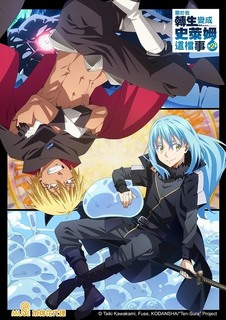

In [7]:
image_filename = '../static/images/史萊姆.png'
encoded_image = base64.b64encode(
    open(image_filename, 'rb').read()).decode('utf-8')
url = f'data:image/png;base64,{encoded_image}'
url

In [ ]:
<div title="131573" class="categoryItemImage" style="background-image: url(&quot;https://s4.anilist.co/file/anilistcdn/media/anime/cover/large/bx131573-rpl82vDEDRm6.jpg&quot;);"></div>



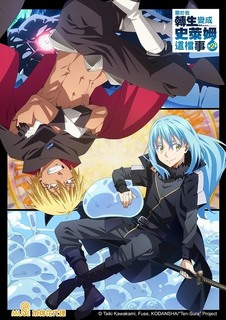

In [8]:
import base64

# 读取 PNG 图像文件为字节流并进行 Base64 编码
with open('../static/images/史萊姆.png', 'rb') as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# 创建 HTML 图像标签
html_image = f'<img src="data:image/png;base64,{encoded_image}" alt="Image">'

print(html_image)

In [4]:
df = pd.read_csv('BaHaMut_9.csv')
type(df)

pandas.core.frame.DataFrame